# 分类决策树

**主要内容**
> 决策树简介

> 在数据集中度量一致性

> 使用递归构造决策树

> 使用matplotlib绘制树形图

决策树的一个重要任务是为了理解数据所蕴含的知识信息，因此决策树可以使用不熟悉的数据集合，并从中提取出一系列规则，这些机器根据数据集创建规则的过程，就是机器学习的过程。

决策树不需要理解机器学习的知识，就能搞明白决策树是如何工作的。主要优势在于数据形式非常容易理解。

<span style="color:red">决策树通常包括3个步骤</span>
1. 特征选择
2. 决策树的生成
3. 决策树的修剪

<span style="color:red">决策树学习的思想</span>
1. Quinlan  1986  ID3
2. Quinlan  1993  C4.5
3. Breiman  1984  CART

## 1 决策树的构造

<span style="color:red">决策树</span>
+ **优点**：计算复杂度不高，输出结果易于理解（可读性），速度快，对中间值的缺失不敏感，可以处理不相关特征数据。
+ **缺点**：可能产生过度匹配的问题
+ **数据类型**：数值型和标称型数据

一棵决策树包含一个根节点、若干内部节点和若干个叶节点；叶节点对应于决策结果，其他每个节点则对应于一个属性测试；每个节点包含的样本集合根据属性测试的结果被划分到子节点中；根节点包含样本全集。从根节点到每个叶节点的路径对应了一个判定测试。决策树学习的目的是为了产生一棵泛化能力强，即处理未见实例能力强的决策树，其基本流程遵循简单的“**分而治之**”策略。

使用决策树进行分类，从根节点开始，对实例的某一特征进行测试，根据测试结果，将实例分配到其子节点；这时每个子节点对应着该特征的一个取值如此递归地对实例进行测试并分配，直至叶节点。最后将实例分到叶节点的类中。

<span style="color:red">创建分支`creatBranch()`的伪代码</span>
```
检测数据集中的每个子项是否属于同一类：
    if so return 类标签
    else
        寻找划分数据集的最好特征
        划分数据集
        创建分支节点
            for每个划分的子集
                调用函数createBranch()并增加返回结果到分支节点中（递归）
         return 分支节点
```

<span style="color:red">决策树的一般流程</span>
1. 收集数据：可以使用任何方法
2. 准备数据：构造树算法**只适用于标称型数据**，因此数值型数据必须离散化
3. 分析数据：可以使用任何方法，构造树完成后，应该检查图形是否符合预期
4. 训练算法：构造树的数据结构
5. 测试算法：使用经验树计算错误率
6. 使用算法：此算法可以**适用于任何监督学习算法**，而使用决策树可以更好地理解数据的内在含义

### 信息增益

特征选择在于选取对训练数据具有分类能力的特征。这样可以提高决策树的学习效率。如果利用一个特征进行分类的结果与随机分类的结果没有很大差别，则称这个特征时没有分类能力的。经验上扔掉这样的特征对决策树学习的精度影响不大。通常特征选择的准则是**信息增益或信息增益比**。

划分数据集的最大原则：将无序的数据变得更加有序。组织杂乱无章数据的一种方法是使用**信息论度量信息**，信息论是量化处理信息的分支科学。

在划分数据集之前之后信息发生的变化称为**信息增益**，获得**信息增益最高的特征**就是最好的划分特征。

集合信息论的度量方式称为**香农熵**或**熵(entropy)**。熵表示随机变量不确定性的度量。

设X是一个取有限个的离散随机变量，其概率分布为
$$P(X=x_i) = p_i, i=1,2,..,n$$

则**随机变量X的熵**为
$$H(X)=-\sum_{i=1}^n p_ilogp_i$$

上式的对数通常以2或e为底，这时熵的单位分别称作比特(bit)或纳特(nat)。由定义可知，熵只依赖于X的分别，而与X的取值无关。

**熵越大，随机变量的不确定性就越大.**

设有随机变量(X, Y)，其联合概率分布为
$$P(X=x_i,Y=y_j) = p_{ij}, i=1,2,...,n; j=1,2,...,m$$

条件熵H(Y|X)表示在已知随机变量X的条件下随机变量Y的不确定性。随机变量X给定的条件下随机变量Y的**条件熵(conditional entropy)H(Y|X)**，定义为 X给定条件下Y的条件概率分布的熵对X的数学期望
$$H(Y|X) = \sum_{i=1}^n{p_iH(Y|X_i)}$$

条件熵H(Y|X)表示在已知随机变量X的条件下随机变量Y的不确定性。随机变量X给定的条件下随机变量Y的条件熵(conditional entropy)H(Y|X)，定义为 X给定条件下Y的条件概率分布的熵对X的数学期望
$$H(Y|X) = \sum_{i=1}^n{p_iH(Y|X_i)}$$
      这里，$p_i = P(X=x_i), i=1,2,...,n$

当熵和条件熵中的概率由数据统计（特别是MLE）得到时，所对应的熵和条件熵分别称为**经验熵(empirical entropy)**和**经验条件熵(empirical conditional entropy)**。此时，如果有0概率，令$0log0=0$。

**信息增益(information gain)**
> 表示得知特征X的信息而使得类Y的信息不确定性减少的程度。

> 特征A对训练数据集D的信息增益g(D,A)，定义为集合D的经验熵H(D)与特征A给定条件下D的经验条件熵H(D|A)之差，即
$$g(D,A) = H(D) - H(D|A)$$

    一般地，熵H(Y)与条件熵H(Y|X)之差称为互信息(mutual information)。决策树学习中的信息增益等价于训练数据集中类与特征的互信息。
    
    决策树学习应用信息增益作为准则选择特征。给定训练数据集D和特征A，经验熵H(D)表示对数据集D进行分类的不确定性。而条件经验熵H(D|A)表示在特征A  给定的条件下对数据集D进行分类的不确定性。那么他们的差，即信息增益，就表示由特征A而使得对数据集D的分类的不确定性减少的程度。显然对于数据集D   而言，信息增益依赖于特征，不同的特征往往具有不同的信息增益。信息增益大的特征具有更强的分类能力。

*根据信息增益选择特征的方法:*

对训练集（或子集）D，计算其每个特征的信息增益，并比较它们的大小，选择信息增益最大的特征。

设训练集为$D$，$|D|$表示其样本容量，即样本个数。设有$K$个类$C_k,k=1,2,..,K$，$|C_k|$为属于类$C_k$的样本个数，$\sum_{k=1}^K|C_k| = |D|$。设特征A有n个不同的取值$\left\{a_1, a_2,..., a_n\right\}$,根据特征A的取值将$D$划分为$n$个子集$D_1, D_2,..,D_n$,$|D_i|$为$D_i$的样本个数，$\sum_{i=1}^n|D_i|=|D|$。记子集$D_i$中属于类$C_k$的样本集合为$D_{ik}$,即$D_{ik}=D_i\bigcap C_k$，$|D_{ik}|$为$D_{ik}$的样本个数。

<span style="color:red">信息增益的算法</span>

**输入**：训练数据集D和特征A

**输出**：特征A对训练集D的信息增益g(D,A)
1. 计算数据集D的经验熵H(D)
$$H(D)=-\sum_{k=1}^K{{\frac{|C_k|}{|D|}}log_2{\frac{|C_k|}{|D|}}}$$
2. 计算特征A对训练集D的条件经验熵H(D|A)
$$H(D|A) = \sum_{i=1}^n{{\frac{|D_i|}{|D|}}H(D_i)} = -\sum_{i=1}^n{\frac{|D_i|}{|D|}{\sum_{k=1}^K{{\frac{|D_{ik}|}{|D_i|}}log_2{\frac{|D_{ik}|}{|D_i|}}}}}$$
3. 计算信息增益
$$g(D,A) = H(D) - H(D|A)$$

### 信息增益比

信息增益值的大小是相对于训练数据集而言的，并没有绝对意义。在分类问题困难时，也就是说在训练数据集的经验熵大的时候，信息增益值会偏大。反之，信息增益值会偏小。使用**信息增益比(information gain ratio)**可以对这一问题进行校正。这是特征选择的另一准则。

> 特征A对训练数据集D的信息增益比$g_R(D,A)$定义为其信息增益$g(D,A)$与训练数据集D的经验熵$H(D)$之比
$$g_R(D,A) = \frac{g(D,A)}{H(D)}$$

In [1]:
import math
import operator
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 数据集（来自《统计学习方法》）
def createDataSet():
    dataSet = [['young', 'no', 'no', 'normal', 0],
               ['young', 'no', 'no', 'good', 0],
               ['young', 'yes', 'no', 'good', 1],
               ['young', 'yes', 'yes', 'normal', 1],
               ['young', 'no', 'no', 'normal', 0],
               ['middleaged', 'no', 'no', 'normal', 0],
               ['middleaged', 'no', 'no', 'good', 0],
               ['middleaged', 'yes', 'yes', 'good', 1],
               ['middleaged', 'no', 'yes', 'great', 1],
               ['middleaged', 'no', 'yes', 'great', 1],
               ['elder', 'no', 'yes', 'great', 1],
               ['elder', 'no', 'yes', 'good', 1],
               ['elder', 'yes', 'no', 'good', 1],
               ['elder', 'yes', 'no', 'great', 1],
               ['elder', 'no', 'no', 'normal', 0]]
    labels = ['age', 'work', 'house', 'creidt']
    return dataSet, labels

**计算给定数据集的熵(entropy)**

In [3]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)  # 数据集中实例总数
    labelCounts = {}  # (类别：出现次数)
    for featVec in dataSet:
        curLabel = featVec[-1]
        if curLabel not in labelCounts.keys():
            labelCounts[curLabel] = 0
        labelCounts[curLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * math.log(prob, 2)
    return shannonEnt  # 数据集的熵

In [5]:
myData, labels = createDataSet()
calcShannonEnt(myData)  # 数据集的熵

0.9709505944546686

**熵越高则混合的数据也就越多**。可以在数据集中添加更多的分类，观察熵是如何变化的。

In [12]:
# 增加第三个名为2的分类，测试熵的变化
myData[0][-1] = 2
calcShannonEnt(myData)

1.2309595631140104

**划分数据集**

In [13]:
def splitDataSet(dataSet, axis, value):
    '''按照给定特征(数据第axis个特征的取值为value)划分数据集'''
    retDataSet = []
    for featVec in dataSet:  # 遍历数据集
        if featVec[axis] == value:  # 抽取数据
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

    参数：带划分的数据集、划分数据集的特征、需要返回的特征的值。Python不用考虑内存分配的问题。Python在函数中传递的是列表的引用，在函数内部对列表对象的修改，将会影响该列表对象的整个生存周期。为了消除这一影响，需要在函数的开始声明有一个新列表对象。因为该函数代码在同一数据集上被调用多次，为了不修改原始数据集，创建一个新的列表对象。

In [14]:
splitDataSet(myData, 1, 'yes')  # work取值为'yes'

[['young', 'no', 'good', 1],
 ['young', 'yes', 'normal', 1],
 ['middleaged', 'yes', 'good', 1],
 ['elder', 'no', 'good', 1],
 ['elder', 'no', 'great', 1]]

**选择最好划分数据集的特征**

In [15]:
def chooseBestFeat2Split(dataSet):
    '''信息增益(gain information)/信息增益比(information gain ratio)'''
    numFeatures = len(dataSet[0]) - 1  # 特征个数
    baseEntropy = calcShannonEnt(dataSet)  # 数据集的熵
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):  # 遍历每一个特征
        uniqueVals = set([example[i] for example in dataSet])  # 第i个特征的所有取值
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            # 不同的分支节点所包含的样本数不同，给节点赋予权重prob
            # 样本数越多的分支节点的影响越大
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)  # 该子集的信息增益
        infoGain = baseEntropy - newEntropy       # gain infomation
        # infoGainRation = infoGain / baseEntropy # infomation gain ratio
        # print infoGain
        # 选择信息增益最大的特征
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

    - 在函数中调用的数据需要满足一定的要求：第一个，数据必须是一种由列表元素组成的列表，而且所有的列表元素都要具有相同的数据长度；第二个，数据的最后一列或每个实例的最后一个元素是当前实例的类别标签。
    - 从列表中创建集合是python语言得到列表中唯一元素值的最快方法。
    - 信息增益是熵的减少或者是数据无序度的减少。

In [34]:
myData, labels = createDataSet()
chooseBestFeat2Split(myData)

2

目前，已经学习了从数据集构造决策树算法的所需要的子功能函数，其工作原理：得到原始数据集，然后基于最好的属性值划分数据集，由于特征值可能多于两个，因此可能存在大于两个分支的数据集划分。第一次划分后，数据将向下传递到树分支的下一节点，在这个节点上，我们可以再次划分数据。因此，采用**递归**的原则处理数据集。

**递归结束的条件**是：遍历所有划分数据集的属性，或者每个分支下的所有实例都具有相同的分类。如果实例具有相同的分类，则得到一个分支节点或终止块。任何到达叶节点的数据必然属于叶节点的分类。

第一个结束条件使得算法可以终止，我们甚至可以设置算法可以划分的最大分组数目。但C4.5和CART算法在运行时并不总是在每次划分分组时都会消耗特征。由于特征数目并不是在每次划分数据分组时都减少，因此这些算法在实际使用时可能引起一定的问题。

如果数据集已经处理所有属性，但是类标签依然不是唯一的，此时我们需要决定如何定义该叶节点，在这种情况下，我们通常采用**多数表决**的方法决定该叶节点的类别。代码如下：

In [ ]:
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount

[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(),
                              key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

    该函数使用分类名称的列表，然后创建键值为classList中唯一值的数据字典，字典对象存储了classList中每个标签出现的频率，最后利用operator操作键值排序字典，并返回出现次数最多的分类名称。

**创建树的函数代码**

In [36]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]  # 类别标签列表
    if classList.count(classList[0]) == len(classList):  # 数据集类别完全相同，递归停止条件1
        return classList[0]
    if len(dataSet[0]) == 1:   # 遍历完所有特征时返回出现次数最多的类别，递归停止条件2
        return majorityCnt(classList)
    bestFeat = chooseBestFeat2Split(dataSet)  # 选择最佳划分特征
    bestFeatLabel = labels[bestFeat]  # 对应的类别标签
    myTree = {bestFeatLabel: {}}
    del (labels[bestFeat])
    # 得到列表包含的所有属性值
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:  # 遍历当前选择特征包含的所有属性值
        # 函数参数是列表时，参数是按照引用方式传递的
        # 为了确保每次调用函数createTree()时不改变原始列表的内容
        # 使用新变量subLabels代替原始列表
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(
                splitDataSet(dataSet, bestFeat, value), subLabels)  # 递归
    return myTree

In [37]:
myData, labels = createDataSet()
createTree(myData, labels)

{'house': {'no': {'work': {'no': 0, 'yes': 1}}, 'yes': 1}}

## 2 绘制树形图

    决策树的主要优点就是直观易于理解，如果不能将其直观地显示出来，就无法发挥其优势。Python并没有绘制树的工具，必须自己绘制。

**在matplotlib中显示中文**

In [38]:
# matplotlib中的中文显示，u'要显示的中文'
plt.rcParams['font.sans-serif'] = ['KaiTi']  # 用来正常显示中文标签(楷体)
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

**使用文本注解绘制树节点**

In [39]:
 # 定义文本框和箭头格式
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle='round4', fc='0.8')
arrow_args = dict(arrowstyle='<-')


# 绘制带箭头的注解
def plotNode(nodeText, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeText, xy=parentPt, xycoords='axes fraction',
                            xytext=centerPt, textcoords='axes fraction',
                            va='center', ha='center', bbox=nodeType,
                            arrowprops=arrow_args)


def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotNode(u'决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode(u'叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

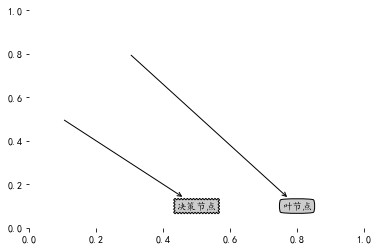

In [40]:
createPlot()

** 构造注解树**

    必须知道有多少个叶节点，以便可以确定x轴的长度；知道有树有多少层，以便可以确定y轴的高度。

In [41]:
def getNumLeafs(myTree):
    '''获取myTree叶节点的数目'''
    numLeafs = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    # 测试节点的数据类型是否为字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


def getTreeDepth(myTree):
    '''获取myTree的层数'''
    maxDepth = 0
    firstStr = myTree.keys()[0]
    secondDict = myTree[firstStr]
    # 测试节点的数据类型是否为字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

In [50]:
myData, labels = createDataSet()
myTree = createTree(myData, labels)
getNumLeafs(myTree)

3

In [51]:
getTreeDepth(myTree)

2

**绘制决策树** 

In [52]:
def plotMidText(cntrPt, parentPt, txtString):
    '''在父子节点间填充文本信息'''
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)


def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)  # 叶节点数
    depth = getTreeDepth(myTree)    # 树层数
    firstStr = myTree.keys()[0]     # 根节点
    cntrPt = (plotTree.x0ff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW,
              plotTree.y0ff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.y0ff -= 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))  # 迭代
        else:
            plotTree.x0ff += 1.0 / plotTree.totalW
            plotNode(secondDict[key], (plotTree.x0ff, plotTree.y0ff),
                     cntrPt, leafNode)
            plotMidText((plotTree.x0ff, plotTree.y0ff), cntrPt, str(key))
    plotTree.y0ff = plotTree.y0ff + 1.0/plotTree.totalD


def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.x0ff = -0.5/plotTree.totalW
    plotTree.y0ff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

    - 全局变量plotTree.totalW存储树的宽度，全局变量plotTree.totalD存储树的深度，使用这两个变量计算树节点树节点的摆放位置，这样可以将树绘制在水平方向和垂直方向的中心位置。
    - 全局变量plotTree.x0ff和plotTree.y0ff追踪已绘制的节点位置，以及放置下一节点的恰当位置。
    - 通过计算树包含的所有叶节点数，划分图形的宽度，从而计算得到当前结点的中心位置，也就是说，我们按照叶节点的数目将x轴划分为若干部分。按照图形比例绘制树形图的最大好处是无需关心实际输出图形大小，一旦图形发生变化，函数会自动按照图形大小重新绘制。如果以像素为单位绘制图形，则缩放图形就不是一件简单的事了。
    - 因为是自顶向下绘制图形，所以需要依次递减y坐标值，而不是递增y坐标值。

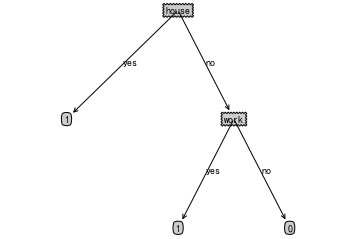

In [53]:
createPlot(myTree)

## 3 测试和存储分类器

**测试算法：使用决策树执行分类**

在进行数据分类时，需要使用决策树以及用于构造决策树的标签向量。然后，程序比较测试与决策上的数值，递归执行该过程知道进入叶节点；最后将测试数据定义为叶节点所属的类型。
 
    验证算法的实际效果：

In [54]:
def classify(inputTree, featLabels, testVec):
    '''使用决策树进行分类'''
    firstStr = inputTree.keys()[0]   # 根节点
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:  # 满足分支条件
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

    在存储带有特征的数据会面临一个问题：程序无法确定特征在数据集中的位置。特征标签列表可以解决这个问题。使用index方法查找当前列表中第一个匹配firstStr变量的元素。然后遍历整棵树，比较testVec变量中的值与树节点的值，如果达到叶节点，则返回当前节点的分类标签

In [55]:
myData, labels = createDataSet()
labels

['age', 'work', 'house', 'creidt']

In [56]:
myTree = createTree(myData, labels)
myTree

{'house': {'no': {'work': {'no': 0, 'yes': 1}}, 'yes': 1}}

In [57]:
classify(myTree, labels, ['young', 'no', 'yes', 'normal'])

ValueError: 'house' is not in list

这里出错原因是`createTree(dataSet, labels)`中的`del (labels[bestFeatLabel])`

In [58]:
classify(myTree, ['age', 'work', 'house', 'creidt'], ['young', 'no', 'no', 'great'])

0

**使用算法：决策树的存储**

    已经创建了决策树分类器，但是每次使用分类器时，必须重新构造决策树。构造决策树是很费时的任务，即使是处理很小的数据集。为了节省时间，最好能够在每次执行分类时调用已经构造好的决策树。
    使用python模块pickle序列化对象。序列化对象可以在磁盘上保存对象，并在需要时读取出来。任何对象都可以执行序列化操作，字典也不例外。

In [59]:
# 使用pickle模块存储决策树
def storeTree(inputTree, filename):
    fw = open(filename, 'w')
    pickle.dump(inputTree, fw)
    fw.close()


def grabTree(filename):
    fr = open(filename)
    return pickle.load(fr)

In [60]:
myTree

{'house': {'no': {'work': {'no': 0, 'yes': 1}}, 'yes': 1}}

In [61]:
storeTree(myTree, 'classifierStorage.txt')
grabTree('classifierStorage.txt')

{'house': {'no': {'work': {'no': 0, 'yes': 1}}, 'yes': 1}}

通过以上的代码，可以将分类器存储在磁盘上，而不用每次对数据分类时重新学习一遍，这也是决策树的优点之一。可以预先提炼并存储数据集中包含的知识信息，在需要对事物进行分类时再使用这些知识。**k近邻算法就无法持久化分类器**。

## 4 示例：使用决策树预测隐形眼镜类型

    隐形眼镜数据集是非常著名的数据集。包含很多患者眼部状况的观察条件以及医生推荐的隐形眼镜类型。隐形眼镜类型包括硬材质、软材质以及不适合佩戴隐形眼镜。数据来源于UCI数据库。本例对数据进行了简单的更改。

In [62]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)
lensesTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

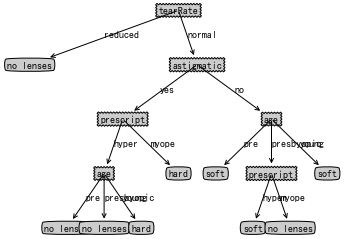

In [63]:
createPlot(lensesTree)

    上图所示的决策树非常好匹配了实验数据，然而这些匹配选项可能太多了，过拟合(overfitting)。为了减少过度匹配问题，使用修剪决策树，去掉一些不必要的叶节点。如果叶节点只能增加少许信息，则可以删除该节点，将它列入到其他叶子节点中。